In [39]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4
# !pip install textblob

In [40]:
# !pip install scikit-learn

In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

**LOAD**

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header= None, index_col= 0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [43]:
df = df[[2,3]].reset_index(drop= True)
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [44]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


**Data Exploration**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [46]:
df.describe()

,sentiment,text
count,75682,74996
unique,4,69972
top,Negative,It is not the first time that the EU Commissio...
freq,22808,172


In [47]:
df.isnull().sum()
df.dropna(inplace= True)
# df = df[df['text'].apply(len)]

In [48]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2113)

In [49]:
df.isnull().sum()


sentiment    0
text         0
dtype: int64

In [50]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [51]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

PREPROCESSING TEXT

In [52]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\dell\appdata\local\temp\pip-req-build-ojknb5uo
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7665 sha256=0d1db269f79a4766348837b2e96afcd4b24909cec477edbb661233d91a9668c3
  Stored in directory: C:\Users\DELL\AppData\Local\Temp\pip-ephem-wheel-cache-rr9iyw5k\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installation: preprocess_kgptalkie 0.1.3
    Uninstalling preprocess_kgptalkie-0.1.3:
      Successfully uninstalled preprocess_kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\DELL\AppData\Local\Temp\pip-req-build-ojknb5uo'


In [53]:
import preprocess_kgptalkie as ps

df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [54]:
df = ps.get_basic_features(df)

In [55]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [56]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [57]:
# !pip install seaborn

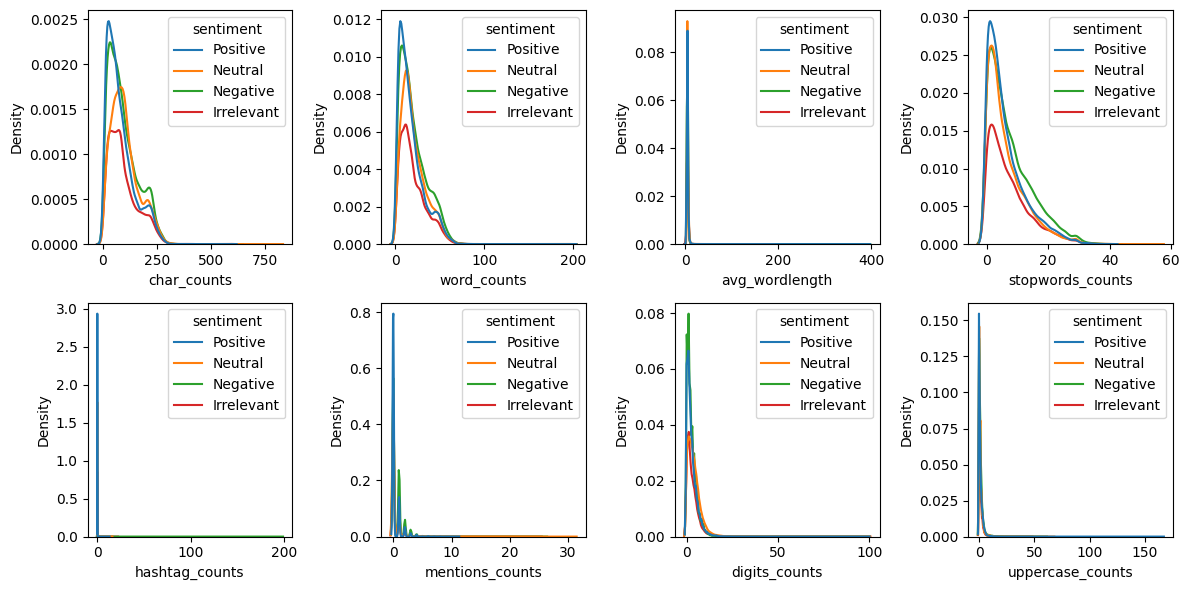

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index+1)
    sns.kdeplot(data = df, x = col, hue="sentiment", fill=False )

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

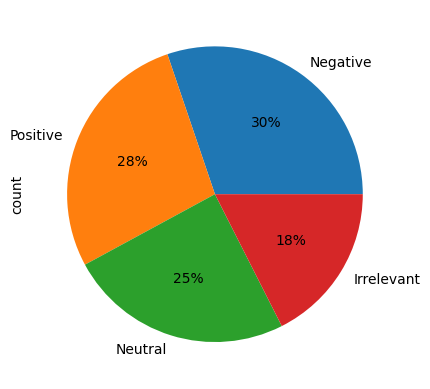

In [68]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [71]:
# !pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

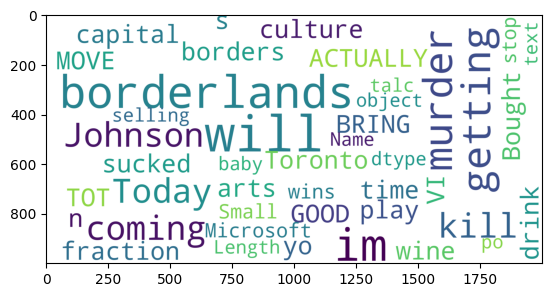

In [74]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

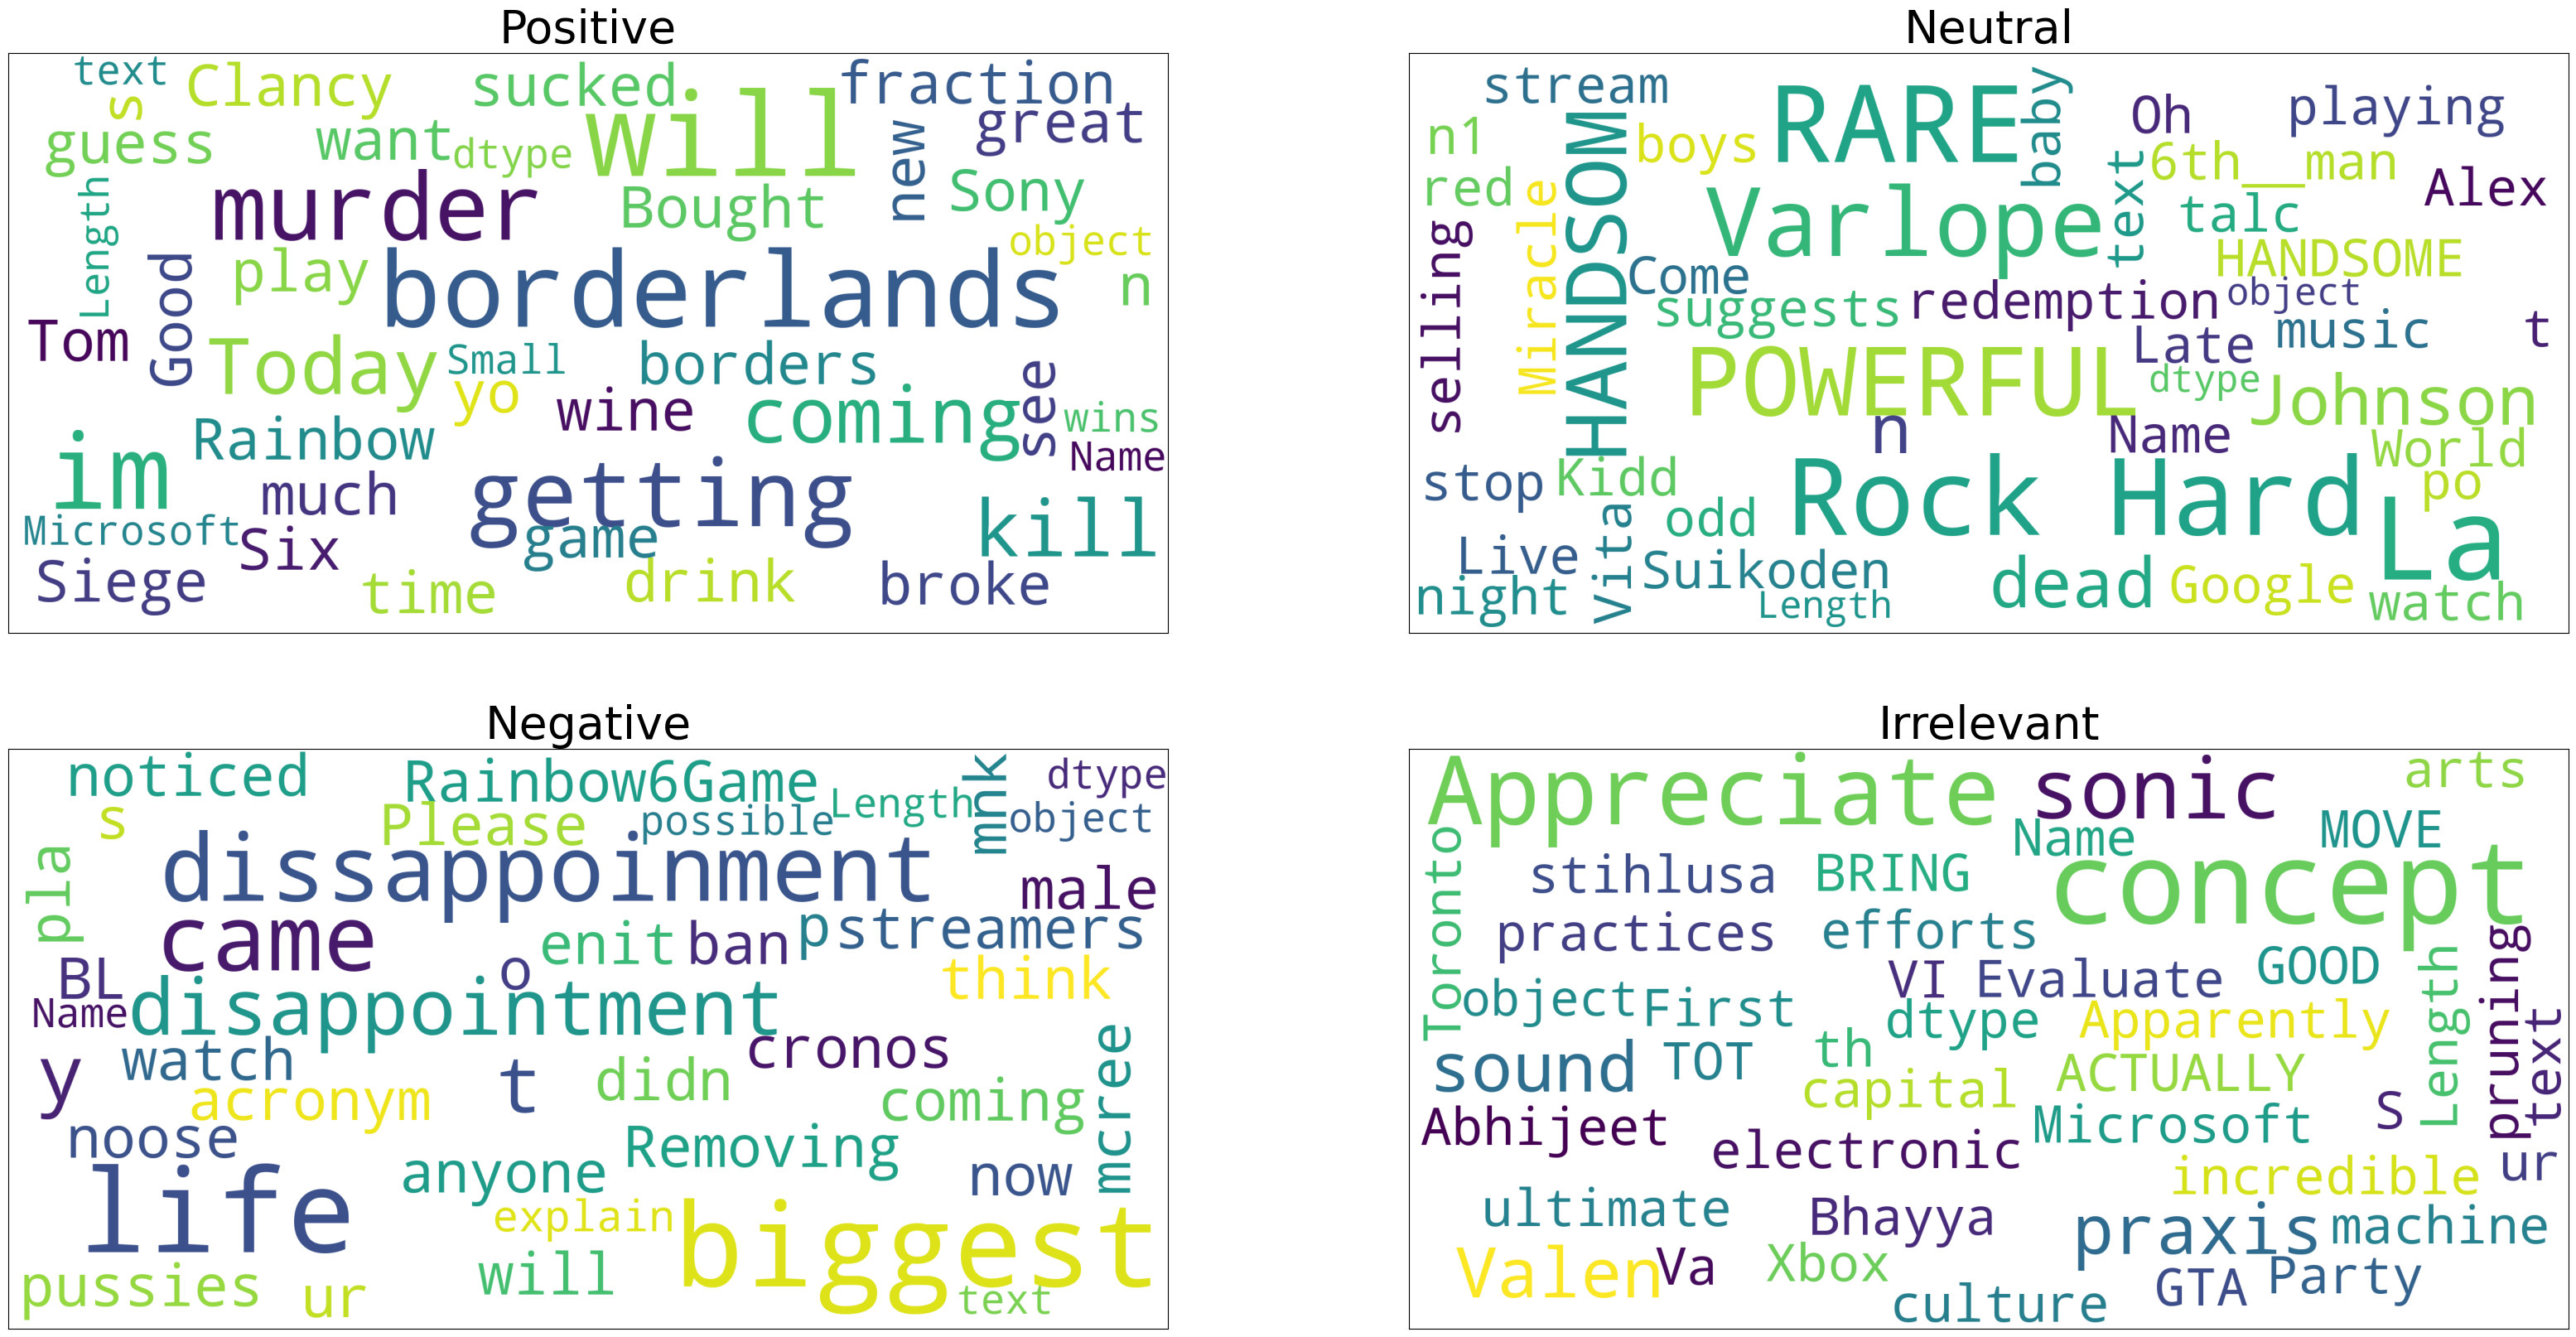

In [77]:
plt.figure(figsize=(40, 20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index+1)

    data=df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, 
                          max_font_size=40, scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

In [80]:
!pip install lxml


   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 217.9 kB/s eta 0:00:18
   ---------------------------------------- 0.0/3.8 MB 109.3 kB/s eta 0:00:35
    --------------------------------------- 0.1/3.8 MB 148.8 kB/s eta 0:00:26
    --------------------------------------- 0.1/3

**CLEANING**

In [83]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))


**TRAIN TEST SPLIT**

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_text = train_test_split(df['text'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0 )


**MODEL**

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [93]:

clf = Pipeline([('tfid', TfidfVectorizer(stop_words='english')), 
                ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer(stop_words='english')),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

EVALUATE

In [94]:
from sklearn.metrics import classification_report

In [95]:

y_pred = clf.predict(X_test)
print(classification_report(y_text, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.96      0.84      0.90      2561
    Negative       0.93      0.94      0.93      4481
     Neutral       0.91      0.90      0.91      3553
    Positive       0.88      0.94      0.91      3982

    accuracy                           0.91     14577
   macro avg       0.92      0.91      0.91     14577
weighted avg       0.92      0.91      0.91     14577



In [96]:
import pickle

pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [97]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [98]:
!pip install streamlit

  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached jsonschema-4.21.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.34.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.18.0-cp39-none-win_amd64.whl.metadata (4.2 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 2.0 MB/s eta 0:00:04
   ---------------------------------------- 0.1/8.1 MB 1.1 MB/s eta 0:00:08
    --------------------------------------- 0.1/8.1 MB 939.4 kB/s eta 0:00:09
    --------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00: